<a href="https://colab.research.google.com/github/SaiAkshay24/Fmml-Python/blob/main/Copy_of_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Lab 6: Linear Classifiers and Perceptron Algorithm
### Lab Coordinator: Shantanu Agrawal

In this lab, we will be studying the use of linear classifiers, followed by using perceptron learning algorithm.

**Linear classifiers** can be understood as form of **classifiers** (which will classify things into two different output categories) and we are doing this by **involving a linear equation**.

## Let's understood how line can classify datapoints using an example:<br>
Given a line as G(X), where X are values of different features given in (d+1)-dimensioanl vector form:<br>
$G(X) = w^TX = 6x_1 + 3x_2 - 12$<br>
(Here, d=2 and w = [6,3,-12], we are assuming the augmented version of w or coefficient vector)

Let's make a toy dataset.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[1,2,1]])

import random
for i in range(10):
  x_1 = random.randint(0,3)
  x_2 = random.randint(0,5)
  X = np.asarray([[x_1, x_2, 1]]) # adding bias term at the end for augmented version of X as well
  points = np.append(points, X, axis=0)

print(points)

[[1 2 1]
 [3 1 1]
 [0 3 1]
 [2 5 1]
 [3 0 1]
 [2 1 1]
 [1 0 1]
 [2 0 1]
 [0 2 1]
 [2 5 1]
 [1 3 1]]


In [ ]:
# We have w or coefficients vector as
w = np.asarray([6,3,-12])

In [ ]:
# Now let's do the linear classification
# we do it by checking the value of G(X)

def linClassification(w, points):
  for point in points:
    gx = 0
    for i in range(len(w)):
      gx+=w[i]*point[i]
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

def linClassification_VectorialForm(w, points):
  for point in points:
    gx = np.sum(w*point)
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

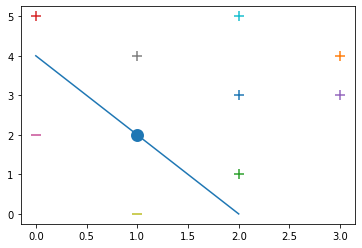

In [ ]:
# Lets first plot the line using axis intercepts
plt.plot([2,0], [0,4])

linClassification(w, points)
plt.show()

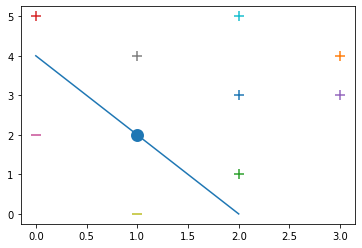

In [ ]:
# Now let's check what happens if we do it vector from

# First plot the line using axis intercepts
plt.plot([2,0], [0,4])

linClassification_VectorialForm(w, points)
plt.show()

So, we can see that how line can classify the data points. And we understand how it is done. But how do we get to know the correct line which would stand as our answer for the dataset.

So, to get the required line, we will try to understand various Linear Classifiers.

### First we have Perceptron Update algorithm to find the required line

We can now code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set.

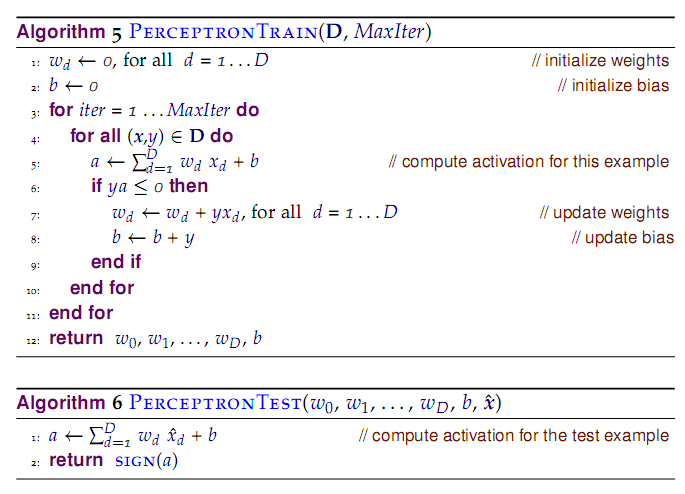

By checking **$y.a <= 0$**, misclassifed data-points have been checked and update is being done accordingly.

For larger data sets it makes sense, to randomly pick a sample during each iteration in the for-loop(s) (i.e, **Batch Perceptron Update**).

The below mentioned algorithm is shown in the above image.

In [ ]:
# Creating the labeled dataset for the example simulation of above shown algorithm
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = np.array([-1, -1, 1, 1, 1])


In [ ]:
def perceptron_algo(X, Y):
    # random line is being called to start the algorithm
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [15]:
# Let's analyse the algorithm against number of iterations needed
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []
    misclassified_points = []
    avg_error = []

    for t in range(n):
        total_error = 0
        number = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                number += 1
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
        misclassified_points.append(number)
        if number==0:
          avg_error.append(number)
        else:
          avg_error.append((total_error * -1)/number)

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(errors, label ='Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(avg_error, label ='Average Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    return w

Next, we will see the the training error at each epoch.

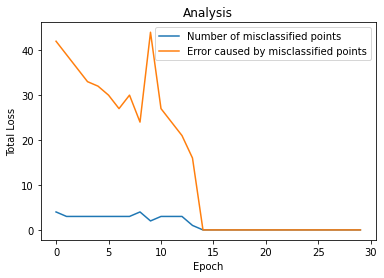

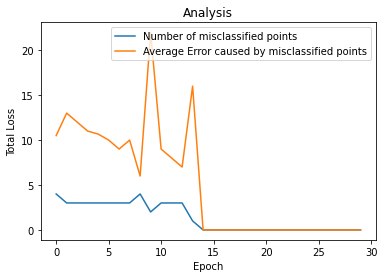

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

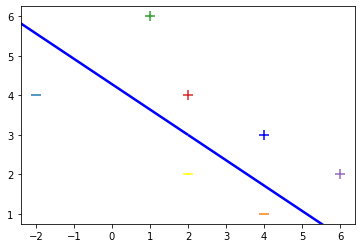

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   In our case eta or the learning rate is equal to 1. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3.   Also try to understand what is happening analytically, if you are increasing or decreasing the learning rate, how it can be helpful to you?
    - [Understanding Learning Rates and How It Improves Performance in Deep Learning](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10). Try to get the gist of the blog, would be more clearer in the later part of the course.
5.   Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
    - [Solving XOR with a single Perceptron](https://medium.com/@lucaspereira0612/solving-xor-with-a-single-perceptron-34539f395182).
6.   Perceptron algorithm trains the model in the manner such that it **just** answers the question according to the training data but does not give the most optimal answer, in the manner that it does not maximizes the seperability from both the classes and thus have a chance of not doing well in validation or testing data. How will you try to solve this problem? Note your observation.
    - [Perceptron vs SVM: a quick comparison](https://medium.com/@subashkharel/perceptron-vs-svm-a-quick-comparison-6b5d6b5d64f). Try to read more such Medim or TowardsDataScience articles for understanding more about Machine Learning.
7.   Can this method or some extension on this be used for classifying more than two classes at once. Note your observations.

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## ANSWER

In [12]:
from google.colab import files


In [13]:
files.upload()

Saving sonar.csv to sonar.csv


{'sonar.csv': b'0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R\n0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R\n0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.861

In [3]:
from random import seed
from random import randrange
from csv import reader

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

In [4]:
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [5]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
	return weights


In [6]:
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
	predictions = list()
	weights = train_weights(train, l_rate, n_epoch)
	for row in test:
		prediction = predict(row, weights)
		predictions.append(prediction)
	return(predictions)

# Testing the Perceptron algorithm on the sonar dataset
seed(1)
# load and prepare data
filename = 'sonar.all-data.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert string class to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 3
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [76.81159420289855, 69.56521739130434, 72.46376811594203]
Mean Accuracy: 72.947%


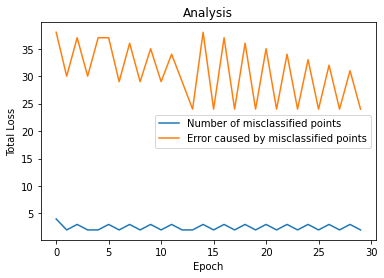

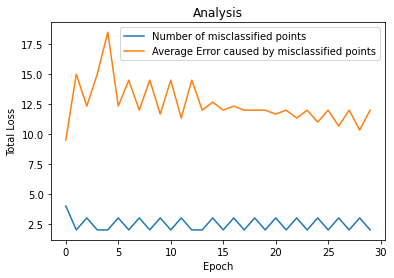

[-2.  3. 15.]


In [25]:
print(perceptron_algo_plot(X, y))